<a href="https://colab.research.google.com/github/Shahana14401/Data_Science-Lab/blob/main/ALL_PRGMS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Training data :  (300, 2)
Training data :  (100, 2)
Accuracy Score: with linear kernel
0.9


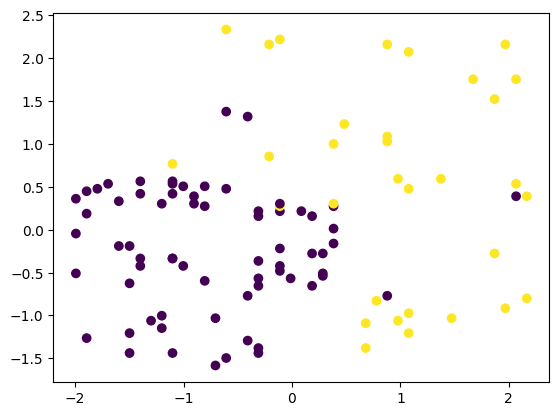

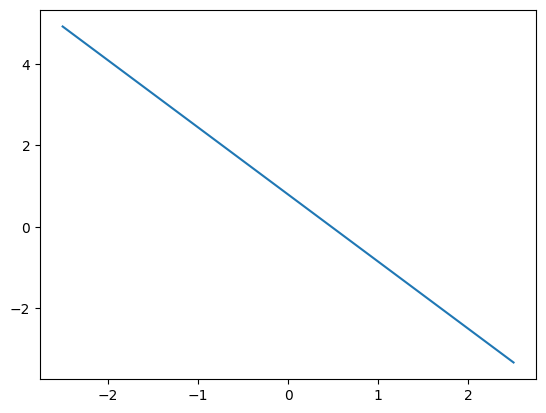

Accuracy Score: with default rbf kernel
0.93


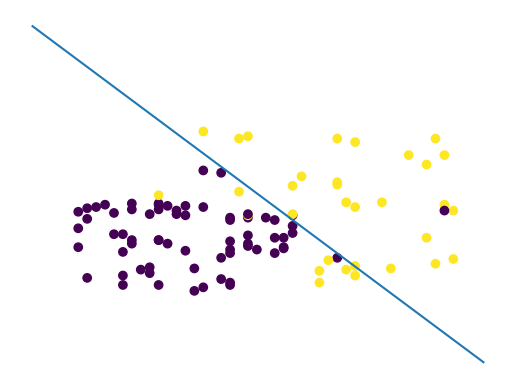

Accuracy Score:with poly kernel and degree 
0.93


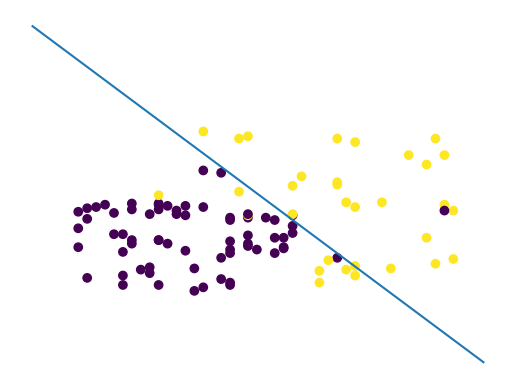

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn import metrics

# Importing the datasets
df = pd.read_csv('Social_Network_Ads.csv')
df.head()
df.shape
X = df.iloc[:,[2,3]]
Y = df.iloc[:, 4]
X.head()
Y.head()

# Splitting the dataset into the Training set and Test set

X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.25, random_state = 0)
print("Training data : ",X_Train.shape)
print("Training data : ",X_Test.shape)

## Feature Scaling

sc_X = StandardScaler()
X_Train = sc_X.fit_transform(X_Train)
X_Test = sc_X.transform(X_Test)

#using linear

classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_Train, Y_Train)
# Predicting the test set results
Y_Pred = classifier.predict(X_Test)
Y_Pred
print('Accuracy Score: with linear kernel')
print(metrics.accuracy_score(Y_Test,Y_Pred))

# plot data points
#code creates a scatter plot where the x-axis corresponds to
#the values in the first column of the X_Test array, the y-axis corresponds
#to the values in the second column of the X_Test array, and the color of each point
#is determined by the values in the Y_Test array.
plt.scatter(X_Test[:, 0], X_Test[:, 1],c=Y_Test)
plt.show()
# Create the hyperplane
#Retrieves the coefficients of the hyperplane from the trained classifier.
# In a linear SVM or logistic regression, these coefficients represent the weights
#assigned to each feature.
w = classifier.coef_[0]
# Calculate the slope of the hyperplane
a = -w[0] / w[1]
# Generates a range of x-values for plotting the hyperplane.
#The linspace function creates an array of evenly spaced values between -2.5 and 2.5.
xx = np.linspace(-2.5, 2.5)
#Calculates the corresponding y-values for the hyperplane using the equation of a line (y = mx + b).
#The intercept term is incorporated here.
yy = a * xx - (classifier.intercept_[0]) / w[1]
# Plot the hyperplane
plt.plot(xx, yy)
plt.show();



##using rbf
classifier1 = SVC(kernel = 'rbf')
classifier1.fit(X_Train, Y_Train)
# Predicting the test set results
Y_Pred = classifier1.predict(X_Test)
print('Accuracy Score: with default rbf kernel')
print(metrics.accuracy_score(Y_Test,Y_Pred))
# plot data points
plt.scatter(X_Test[:, 0], X_Test[:, 1],c=Y_Test)
# Create the hyperplane
w = classifier.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-2.5, 2.5)
yy = a * xx - (classifier.intercept_[0]) / w[1]
# Plot the hyperplane
plt.plot(xx, yy)
plt.axis("off"),plt.show();


#using poly
svc=SVC(kernel='poly', degree = 4)
svc.fit(X_Train,Y_Train)
y_pred=svc.predict(X_Test)
print('Accuracy Score:with poly kernel and degree ')
print(metrics.accuracy_score(Y_Test,Y_Pred))
# plot data points
plt.scatter(X_Test[:, 0], X_Test[:, 1],c=Y_Test)
# Create the hyperplane
w = classifier.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-2.5, 2.5)
yy = a * xx - (classifier.intercept_[0]) / w[1]
# Plot the hyperplane
plt.plot(xx, yy)
plt.axis("off"), plt.show();

Coefficients: 
 [938.23786125]
Intercept: 
 152.91886182616113
Mean Squared Error: 2548.07
Coefficient of determination: 0.47


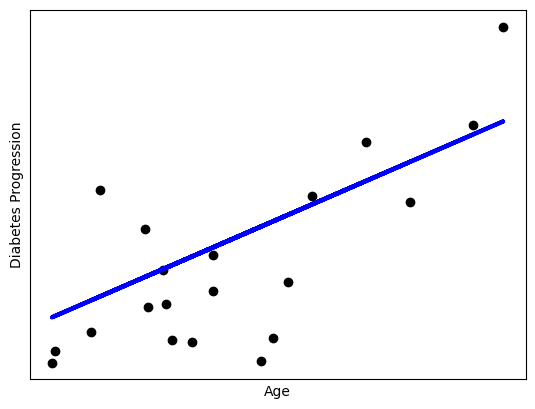

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
diabetes = datasets.load_diabetes()



# Use only one feature (column) for simplicity
#[:, 2]: Selects the third column of the diabetes.data array.
#In Python, indexing starts from 0, so 2 refers to the third column.
#np.newaxis: Introduces a new axis to the array. This effectively changes
#a one-dimensional array into a two-dimensional array. The new axis is
#added at the second position, turning each element of the selected column into a sub-array.
#diabetes_X: The resulting array, stored in the variable diabetes_X, is a two-dimensional array where
#each row corresponds to a data point, and each data point has only one feature (the third column of the
# original dataset).
diabetes_X = diabetes.data[:, np.newaxis, 2]

# Split the data into training/testing sets
#The code then splits the selected feature
#(diabetes_X) into training and testing sets. The training set
#(diabetes_X_train) contains all data except the last 20 samples,
#and the testing set (diabetes_X_test) contains the last 20 samples.
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

# Create linear regression object
reg = linear_model.LinearRegression()

# Train the model using the training sets
reg.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = reg.predict(diabetes_X_test)

# Print the coefficients and intercept
print("Coefficients: \n", reg.coef_)
print("Intercept: \n", reg.intercept_)

# Print mean squared error
#Mean Squared Error (MSE): It measures the average of the squared differences between
# the predicted and actual values. A lower MSE indicates better model performance.
print("Mean Squared Error: %.2f" % mean_squared_error(diabetes_y_test, diabetes_y_pred))

# Print coefficient of determination (r2 score)
#Coefficient of Determination (R² Score): It represents the proportion of the variance in the dependent
#variable (target) that is predictable from the independent variable (features). R² score ranges from 0 to 1,
# with 1 indicating a perfect fit.
print("Coefficient of determination: %.2f" % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test, color="black")

#This line creates a line plot where the x-axis represents the age (diabetes_X_test),
#the y-axis represents the predicted diabetes progression values (diabetes_y_pred), and
#the line is plotted in blue with a linewidth of 3.
plt.plot(diabetes_X_test, diabetes_y_pred, color="blue", linewidth=3)

plt.xlabel("Age")
plt.ylabel("Diabetes Progression")
plt.xticks(())
plt.yticks(())

plt.show()


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


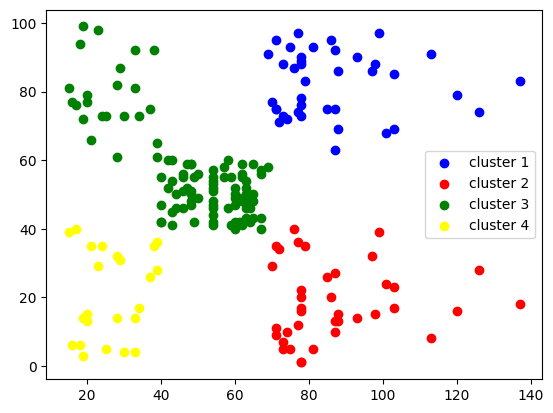

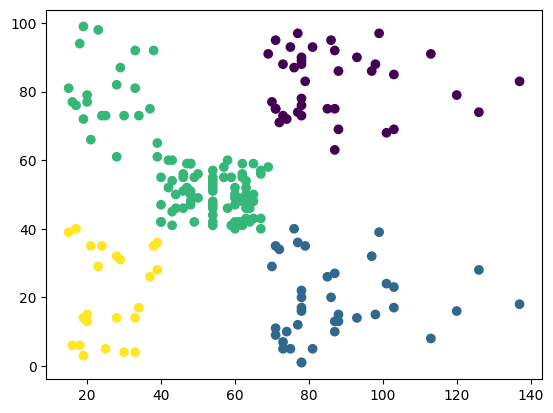

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

mydata = pd.read_csv("Mall_Customers.csv")

print(mydata.head())
x=mydata.iloc[:,[3,4]].values
km=KMeans(n_clusters=4)
km.fit(x)
pred=km.predict(x)
#print(pred)

#plotting

plt.scatter(x[pred==0,0],x[pred==0,1],c='blue',label='cluster 1')
plt.scatter(x[pred==1,0],x[pred==1,1],c='red',label='cluster 2')
plt.scatter(x[pred==2,0],x[pred==2,1],c='green',label='cluster 3')
plt.scatter(x[pred==3,0],x[pred==3,1],c='yellow',label='cluster 4')
plt.legend()
plt.show()
#or method
plt.scatter(x[:,0],x[:,1],c=pred)
plt.show()

In [ ]:
import numpy as np
a=np.array([1,2,3])
print("type:%s"%type(a))
print("shape:%s"%a.shape)
print(a[0],a[1],a[2])
a[0]=5
print(a)
b=np.array([[1,2,3],[4,5,6]])
print("\n shape of b:",b.shape)
print(b[0,0],b[0,1],b[1,0])
a=np.zeros((2,2))
print("All zeros matrix:\n %s"%a)
b=np.ones((1,2))
print("All ones matrix:\n %s"%b)
d=np.eye(2)
print("\n identity matrix:\n %s"%d)
e=np.random.random((2,2))
print("\n random matrix:\n %s"%e)
print("vectorized sum example \n")
x=np.array([[1,2],[3,4]])
print("x:\n%s"%x)
print("sum:%s"%np.sum(x))
print("sum axis=0:%s"%np.sum(x,axis=0))
print("sum axis=1:%s"%np.sum(x,axis=1))
a=np.arange(10000)
b=np.arange(10000)
dp=np.dot(a,b)
print("Dot product:%s\n"%dp)
op=np.outer(a,b)
print("\n Outer product:%s\n"%op)
ep=np.multiply(a,b)
print("\n Element wise product:%s\n"%ep)

type:<class 'numpy.ndarray'>
shape:3
1 2 3
[5 2 3]

 shape of b: (2, 3)
1 2 4
All zeros matrix:
 [[0. 0.]
 [0. 0.]]
All ones matrix:
 [[1. 1.]]

 identity matrix:
 [[1. 0.]
 [0. 1.]]

 random matrix:
 [[0.12508962 0.56202985]
 [0.7334012  0.92518979]]
vectorized sum example 

x:
[[1 2]
 [3 4]]
sum:10
sum axis=0:[4 6]
sum axis=1:[3 7]
Dot product:333283335000


 Outer product:[[       0        0        0 ...        0        0        0]
 [       0        1        2 ...     9997     9998     9999]
 [       0        2        4 ...    19994    19996    19998]
 ...
 [       0     9997    19994 ... 99940009 99950006 99960003]
 [       0     9998    19996 ... 99950006 99960004 99970002]
 [       0     9999    19998 ... 99960003 99970002 99980001]]


 Element wise product:[       0        1        4 ... 99940009 99960004 99980001]



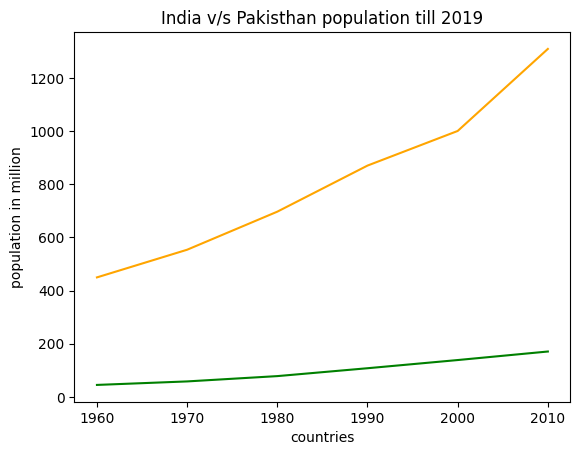

In [ ]:
import matplotlib.pyplot as plt

year=[1960,1970,1980,1990,2000,2010]
pop_pakisthan = [44.91,58.09,78.07,107.7,138.5,170.6]
pop_india = [449.48,553.57,696.783,870.133,1000.4,1309.1]

plt.plot(year,pop_pakisthan,color="Green")
plt.plot(year,pop_india,color="Orange")
plt.xlabel("countries")
plt.ylabel("population in million")
plt.title("India v/s Pakisthan population till 2019")
plt.show();

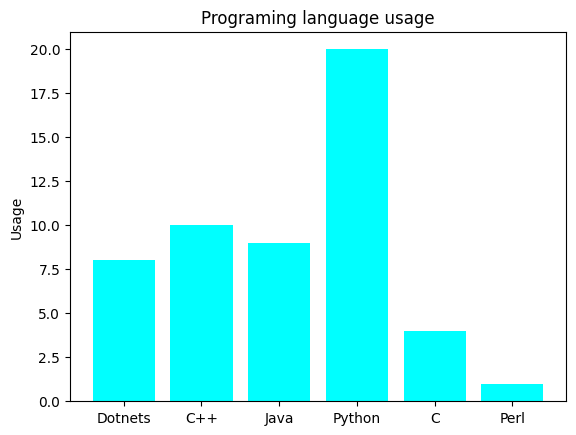

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

objects = ("Dotnets","C++","Java","Python","C","Perl")
y_pos = np.arange(len(objects))
performance = [8,10,9,20,4,1]
plt.bar(y_pos,performance,align = "center",color = "cyan")
plt.xticks(y_pos,objects)
plt.ylabel("Usage")
plt.title("Programing language usage")
plt.show()

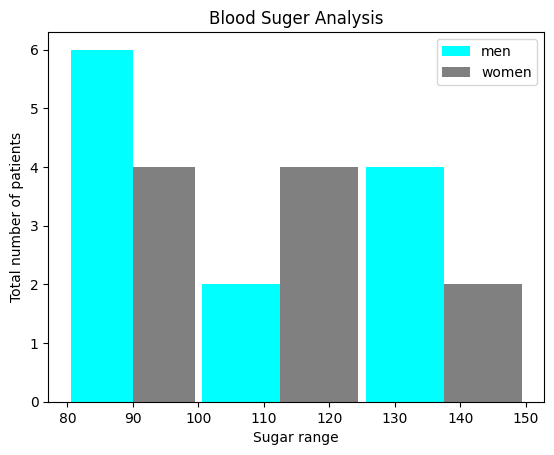

In [ ]:
import matplotlib.pyplot as plt

bldsugar_men = [113,85,90,150,149,88,93,115,135,80,77,82,129]
bldsugar_women = [67,98,89,120,133,150,84,69,89,79,120,112,100]

plt.xlabel("Sugar range")
plt.ylabel("Total number of patients")
plt.title("Blood Suger Analysis")
plt.hist(([bldsugar_men,bldsugar_women]),bins = [80,100,125,150] ,
         rwidth = 0.95 , color =["cyan","gray"] , label = ["men","women"])
plt.legend()

plt.show()

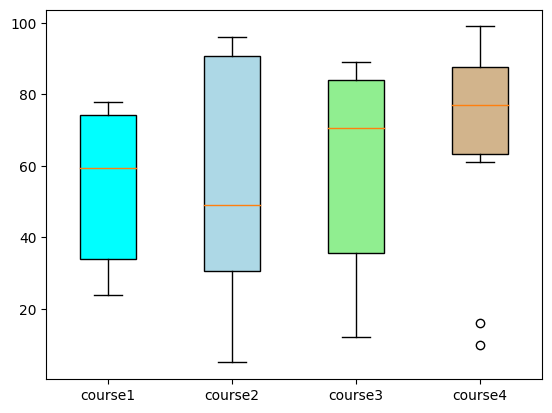

In [ ]:
import matplotlib.pyplot as plt

value1 = [72,76,24,40,57,62,75,78,31,32]
value2 = [62,5,91,25,36,32,96,95,30,90]
value3 = [23,89,12,78,72,89,25,69,68,86]
value4 = [99,73,70,16,81,61,88,98,10,87]

box_plotdata = [value1,value2,value3,value4]
box = plt.boxplot(box_plotdata , vert=1 , patch_artist=True,labels=['course1','course2','course3','course4'])

colors = ["cyan","lightblue","lightgreen","tan"]
for patch,color in zip(box['boxes'],colors):
    patch.set_facecolor(color)
plt.show()



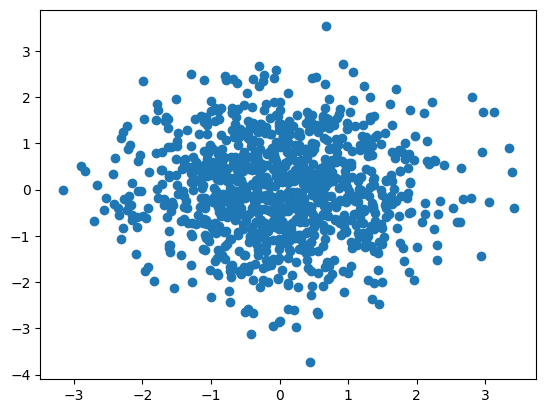

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
x=np.random.randn(1000)
y=np.random.randn(1000)
plt.scatter(x,y)
plt.show()

In [ ]:

import pandas as pd

data_dict1={'customer id ':[1,2,3,4,5,6,7,8,9,10],
           'Gender':['male','female','female','male','male','female','male','male','female','male'],
           'Age':[20,21,19,18,25,26,32,41,20,19],
            'AnualIncome(k$)':[10,20,30,10,25,60,70,15,21,22],
           'SpendingScore':[30,50,58,84,90,65,32,46,12,56]}
data1 = pd.DataFrame(data_dict1)
data1.to_csv("customer1.csv")
print(data1)
print("\n--------------------------------------------------")
data_dict2={'customer id ':[11,12,13,14,15,16,17,18,19,20],
           'Gender':['male','female','female','male','male','female','male','male','female','male'],
           'Age':[20,21,19,18,25,26,32,41,20,19],
           'SpendingScore':[23,33,19,18,25,26,32,41,20,19],
           'AnualIncome(k$)':[10,20,30,10,25,60,70,15,21,22],
           'SpendingScore':[30,50,58,84,90,65,32,46,12,56]}
data2 = pd.DataFrame(data_dict2)
data2.to_csv("customer2.csv")
print(data2)
print("\n--------------------------------------------------")
df=pd.concat(map(pd.read_csv,['customer1.csv','customer2.csv']),ignore_index=True)
df.to_csv("mergefile.csv",index=False)
print(df)

   customer id   Gender  Age  AnualIncome(k$)  SpendingScore
0             1    male   20               10             30
1             2  female   21               20             50
2             3  female   19               30             58
3             4    male   18               10             84
4             5    male   25               25             90
5             6  female   26               60             65
6             7    male   32               70             32
7             8    male   41               15             46
8             9  female   20               21             12
9            10    male   19               22             56

--------------------------------------------------
   customer id   Gender  Age  SpendingScore  AnualIncome(k$)
0            11    male   20             30               10
1            12  female   21             50               20
2            13  female   19             58               30
3            14    male   18     

In [ ]:
import pandas as pd
import numpy as np

student = {'RollNo':[1,2,3,4,5],
           'name':['Lekshmi','Krishnaveni','Neeraja','Sheena','Shivashankar'],
          'Department':['MCA','MCA','CSE','MECH','MBA'],
          'Semester':['s1','s2','s1','s2','s1']}
df=pd.DataFrame(student)
print("\n\n\n\nBefore Sorting")
print("--------------")
print(df)
print("\n\n\nAfter Sorting")
print("--------------")
df.sort_values(by=['name','RollNo'], ascending=False)





Before Sorting
--------------
   RollNo          name Department Semester
0       1       Lekshmi        MCA       s1
1       2   Krishnaveni        MCA       s2
2       3       Neeraja        CSE       s1
3       4        Sheena       MECH       s2
4       5  Shivashankar        MBA       s1



After Sorting
--------------


,RollNo,name,Department,Semester
4,5,Shivashankar,MBA,s1
3,4,Sheena,MECH,s2
2,3,Neeraja,CSE,s1
0,1,Lekshmi,MCA,s1
1,2,Krishnaveni,MCA,s2


classes to predict:  ['setosa' 'versicolor' 'virginica']
Features:  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


(150, 4)

(150,)

Accuracy on train data using entropy 1.0
Accuracy on test data using entropy 0.9473684210526315
Accuracy on train data using entropy 0.9642857142857143
Accuracy on test data using entropy 0.9473684210526315


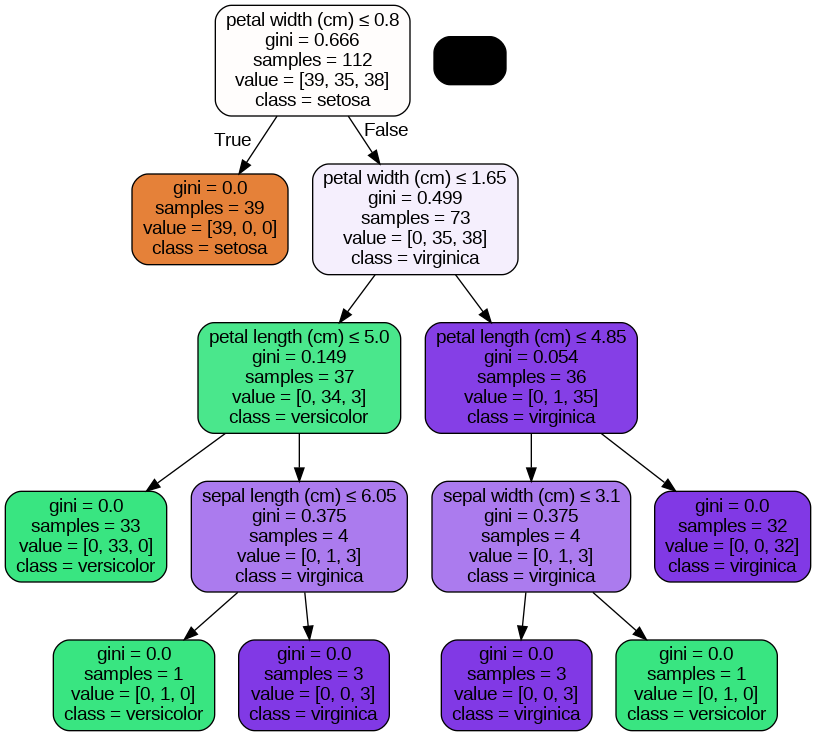

In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

#load iris data

data = load_iris()
data.data.shape
print('classes to predict: ',data.target_names)
print('Features: ',data.feature_names)

X = data.data
y = data.target

display (X.shape, y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 50, test_size = 0.25)

#default criterion is Gini

classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

#change criterion to entropy

classifier_entropy = DecisionTreeClassifier(criterion='entropy')
classifier_entropy.fit(X_train, y_train)
y_pred_entropy = classifier_entropy.predict(X_test)

print('Accuracy on train data using entropy', accuracy_score(y_true=y_train, y_pred = classifier_entropy.predict(X_train)))
print('Accuracy on test data using entropy', accuracy_score(y_true=y_test, y_pred = y_pred_entropy))

#change criterion to entropy with min_samples_split to 50. Default value is 2

classifier_entropy1 = DecisionTreeClassifier(criterion='entropy', min_samples_split=50)
classifier_entropy1.fit(X_train, y_train)
y_pred_entropy1 = classifier_entropy1.predict(X_test)

print('Accuracy on train data using entropy', accuracy_score(y_true=y_train, y_pred = classifier_entropy1.predict(X_train)))
print('Accuracy on test data using entropy', accuracy_score(y_true=y_test, y_pred = y_pred_entropy1))

#visualise the decision tree

from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

dot_data = StringIO()

#the students can try using classifier, classifier_entropy and classifier_entropy1
#as first parameter below.

export_graphviz(classifier, out_file = dot_data,filled = True, rounded = True,special_characters = True, feature_names = data.feature_names, class_names = data.target_names)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

dataset = pd.read_csv('diabetes.csv')
print (len(dataset))
print (dataset.head())

#data Preprocessing
zero_not_accepted = ['Glucose','BloodPressure','SkinThickness','BMI','Insulin']
for column in zero_not_accepted:
    dataset[column] = dataset[column].replace(0,np.NaN)
    mean = int(dataset[column].mean(skipna=True))
    dataset[column] = dataset[column].replace(np.NaN,mean)

#split dataset
x = dataset.iloc[: , 0:8]
y = dataset.iloc[:, 8 ]
X_train , X_test , y_train , y_test = train_test_split(x,y,random_state=0,test_size=0.2)

#Feature scaling
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

#Define the model :Init K-NN
classifier = KNeighborsClassifier(n_neighbors = 11,p=2 , metric = 'euclidean')
classifier.fit(X_train,y_train)

#Predict the test result
y_predict = classifier.predict(X_test)
print(y_predict)

#Evaluate the model
cm = confusion_matrix(y_test , y_predict)
print(cm)
print(f1_score(y_test,y_predict))
print(accuracy_score(y_test,y_predict))

768
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
[1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0
 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 1 1 0 0 0 1 0 1 1 0 0 1 1 1 1 0 0 0 0 0 0 1
 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 1 1 0 1 0 1 0
 0 1 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import neighbors, datasets, preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score


iris = datasets.load_iris()
X, y = iris.data[:, :], iris.target
print(y)
p= iris.target_names
print(p)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state = 0, train_size = 0.3)

#Feature Scaling

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
scores = []
classifier = GaussianNB()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
scores.append(accuracy_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(scores)
scores1=[]
classifier1 = BernoulliNB()
classifier1.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
scores1.append(accuracy_score(y_test, y_pred))
cm1 = confusion_matrix(y_test, y_pred)

print(cm1)
print(scores1)
print("Classification Report")
print(classification_report(y_test, y_pred))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
['setosa' 'versicolor' 'virginica']
[[35  0  0]
 [ 0 31  4]
 [ 0  2 33]]
[0.9428571428571428]
[[35  0  0]
 [ 0 31  4]
 [ 0  2 33]]
[0.9428571428571428]
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       0.94      0.89      0.91        35
           2       0.89      0.94      0.92        35

    accuracy                           0.94       105
   macro avg       0.94      0.94      0.94       105
weighted avg       0.94      0.94      0.94       105

